# Project 11 -- Lukas Anell

## Question 1

In [27]:
library(dplyr)
library(ggplot2)

In [28]:
myDF <- read.csv('/anvil/projects/tdm/data/zillow/State_time_series.csv')
head(myDF)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1996-04-30,Alabama,NA,NA,NA,NA,NA,NA,NA,NA,...,45600,99500,79500,79000,140200,NA,NA,NA,NA,NA
2,1996-04-30,Arizona,NA,NA,NA,NA,NA,NA,NA,NA,...,67100,78900,103600,107500,168700,NA,NA,NA,NA,NA
3,1996-04-30,Arkansas,NA,NA,NA,NA,NA,NA,NA,NA,...,38400,70300,64400,64500,115200,NA,NA,NA,NA,NA
4,1996-04-30,California,NA,NA,NA,NA,NA,NA,NA,NA,...,95100,136100,157900,162000,270600,NA,NA,NA,NA,NA
5,1996-04-30,Colorado,NA,NA,NA,NA,NA,NA,NA,NA,...,82700,99400,128100,133600,209300,NA,NA,NA,NA,NA
6,1996-04-30,Connecticut,NA,NA,NA,NA,NA,NA,NA,NA,...,83700,85000,132000,141000,231600,NA,NA,NA,NA,NA


In [29]:
myDF_cleaned <- myDF %>%
  filter(!is.na(RegionName),
         !is.na(DaysOnZillow_AllHomes))
head(myDF_cleaned)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,2010-01-31,Alabama,169,32616,29765,NA,98.49197,93.09783,103.93570,110.90909,...,67900,137300,123800,123300,232500,NA,NA,NA,NA,NA
2,2010-01-31,Alaska,130,3477,2748,182.0312,163.35188,154.22483,144.43942,125.41806,...,177200,176100,247200,257100,356200,NA,NA,NA,NA,NA
3,2010-01-31,Arizona,112,50221,50480,NA,NA,NA,NA,NA,...,95700,121800,161300,168600,298400,NA,NA,NA,NA,NA
4,2010-01-31,Arkansas,121,18475,17418,NA,81.40726,86.21399,94.74342,96.91539,...,59200,127500,105800,105800,185100,NA,NA,NA,NA,NA
5,2010-01-31,California,108,138652,132194,NA,NA,NA,NA,NA,...,163600,313600,335100,340000,655700,NA,NA,NA,NA,NA
6,2010-01-31,Colorado,142,46680,41554,209.7378,157.98713,145.83333,153.84615,173.55633,...,130000,155700,215600,225100,388300,NA,NA,NA,NA,NA


In [30]:
unique_before <- sort(unique(myDF$RegionName))
unique_after  <- sort(unique(myDF_cleaned$RegionName))

length(unique_before)
length(unique_after)

[1] 52

[1] 51

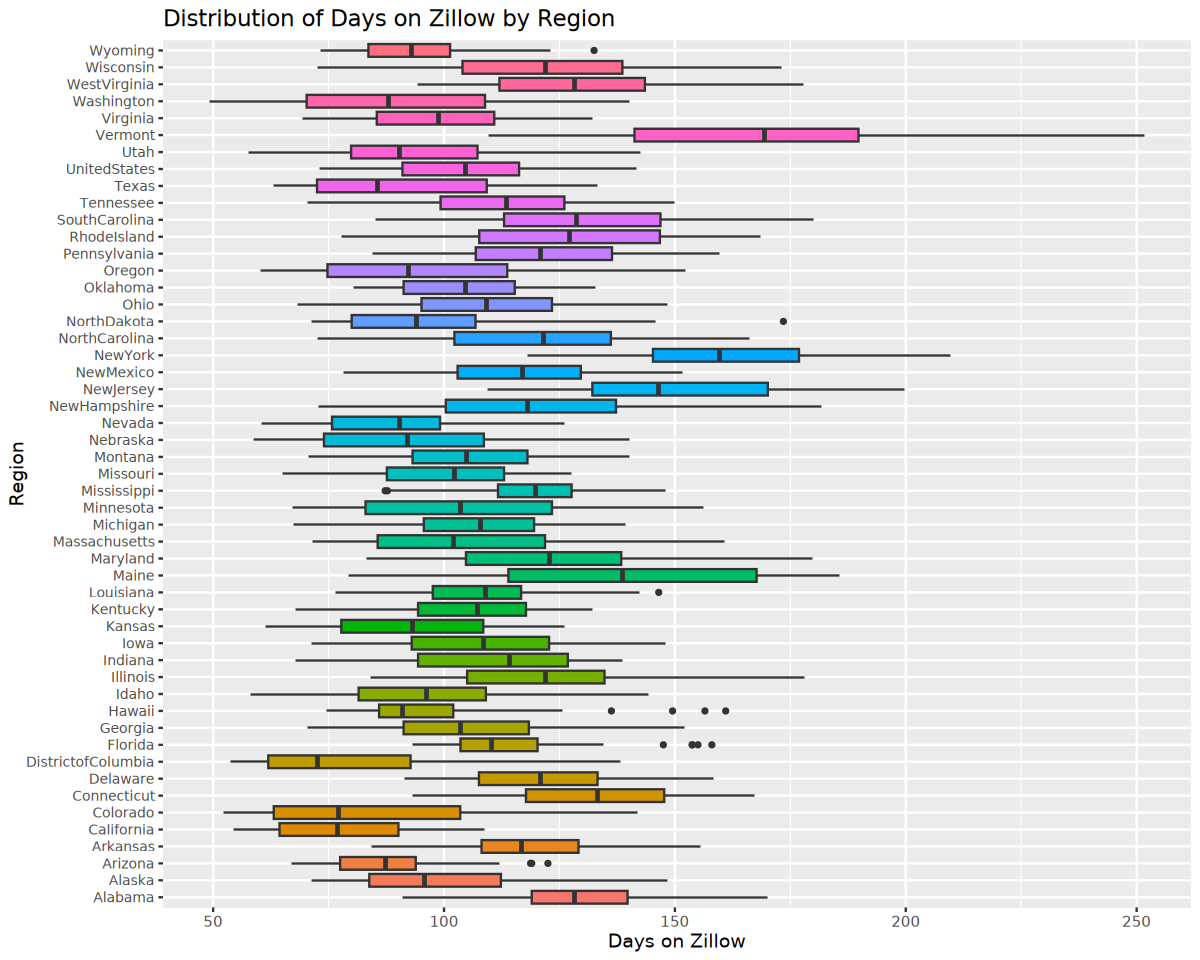

In [31]:
options(repr.plot.width = 10, repr.plot.height = 8)
p_all_regions <- ggplot(
    myDF_cleaned, 
    aes(
        x = RegionName,
        y = DaysOnZillow_AllHomes,
        fill = RegionName
    )
) +
    geom_boxplot(
        outlier.size = 1,
        coef = 1.5
    ) +
    coord_flip() +
    labs(
        title = "Distribution of Days on Zillow by Region",
        x = "Region",
        y = "Days on Zillow"
    ) +
    theme(
        legend.position = "none",
        axis.text.y = element_text(size = 8)
    )

p_all_regions

In [32]:
the_northeast <- c('Connecticut', 'Maine', 'Massachusetts', 'NewHampshire', 'NewJersey', 'NewYork', 'Pennsylvania', 'RhodeIsland', 'Vermont')
the_midwest <- c('Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'NorthDakota', 'Ohio', 'Wisconsin')
the_south <- c('Alabama', 'Arkansas', 'Delaware', 'DistrictofColumbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'NorthCarolina', 'Oklahoma', 'SouthCarolina', 'Tennessee', 'Texas', 'Virginia', 'WestVirginia')
the_west <- c('Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'NewMexico', 'Oregon', 'Utah', 'Washington', 'Wyoming')

In [33]:
myDF_cleaned$NewRegions <- ifelse(myDF_cleaned$RegionName %in% the_northeast, "Northeast",
                           ifelse(myDF_cleaned$RegionName %in% the_midwest, "Midwest",
                           ifelse(myDF_cleaned$RegionName %in% the_south, "South",
                           ifelse(myDF_cleaned$RegionName %in% the_west, "West", "Other"))))

myDF_cleaned <- myDF_cleaned %>%
    mutate(CensusRegion = case_when(
        RegionName %in% the_northeast ~ "Northeast",
        RegionName %in% the_midwest ~ "Midwest",
        RegionName %in% the_south ~ "South",
        RegionName %in% the_west ~ "West",
        TRUE ~ "Other"
    ))

head(myDF_cleaned)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,NewRegions,CensusRegion
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>
1,2010-01-31,Alabama,169,32616,29765,NA,98.49197,93.09783,103.93570,110.90909,...,123800,123300,232500,NA,NA,NA,NA,NA,South,South
2,2010-01-31,Alaska,130,3477,2748,182.0312,163.35188,154.22483,144.43942,125.41806,...,247200,257100,356200,NA,NA,NA,NA,NA,West,West
3,2010-01-31,Arizona,112,50221,50480,NA,NA,NA,NA,NA,...,161300,168600,298400,NA,NA,NA,NA,NA,West,West
4,2010-01-31,Arkansas,121,18475,17418,NA,81.40726,86.21399,94.74342,96.91539,...,105800,105800,185100,NA,NA,NA,NA,NA,South,South
5,2010-01-31,California,108,138652,132194,NA,NA,NA,NA,NA,...,335100,340000,655700,NA,NA,NA,NA,NA,West,West
6,2010-01-31,Colorado,142,46680,41554,209.7378,157.98713,145.83333,153.84615,173.55633,...,215600,225100,388300,NA,NA,NA,NA,NA,West,West


In [34]:
table(myDF_cleaned$NewRegions)


  Midwest Northeast     Other     South      West 
     1045       855        95      1615      1235 

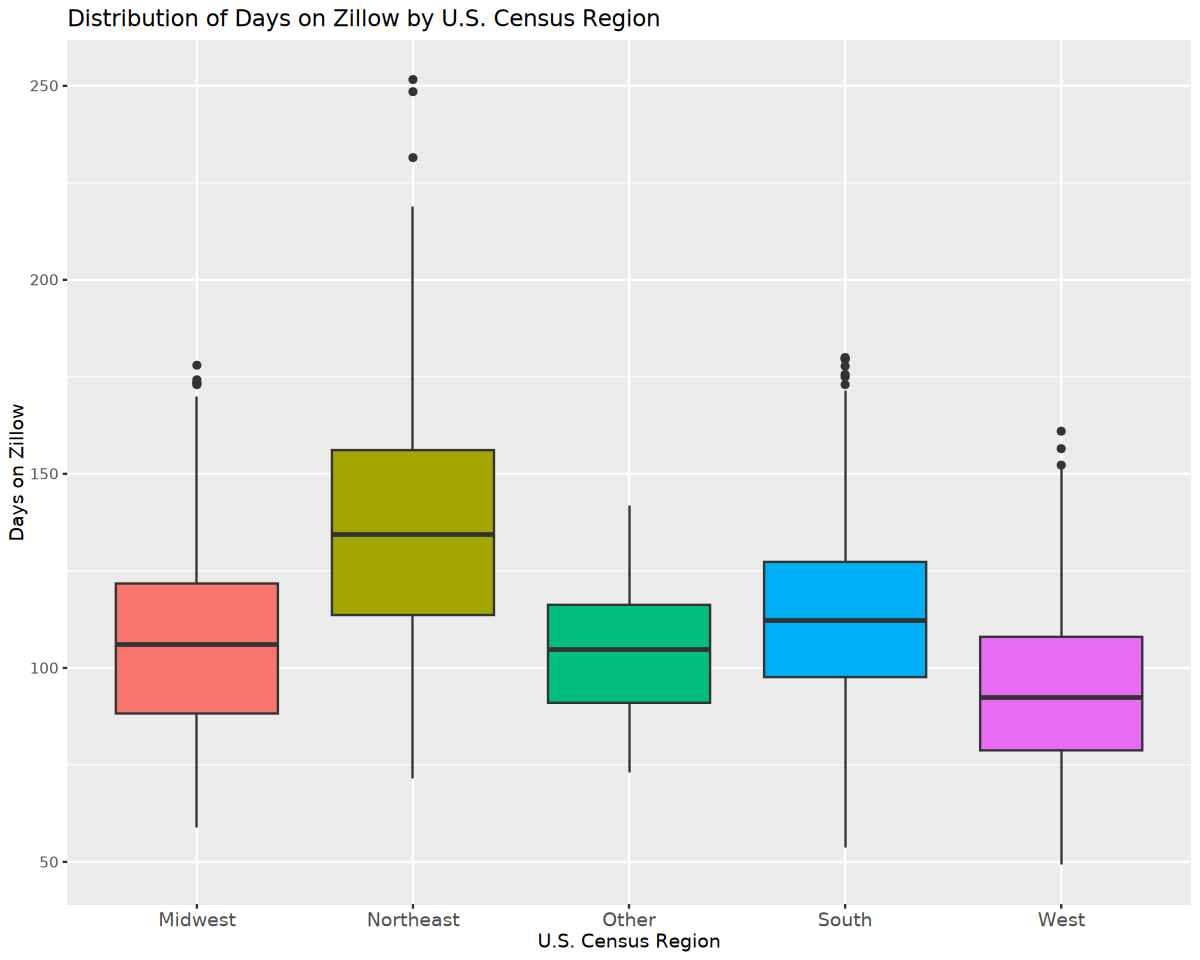

In [35]:
p_by_census <- ggplot(
    myDF_cleaned,
    aes(
        x = NewRegions,
        y = DaysOnZillow_AllHomes,
        fill = NewRegions
    )
) +
    geom_boxplot(outlier.size = 1.5) +
    labs(
        title = "Distribution of Days on Zillow by U.S. Census Region",
        x = "U.S. Census Region",
        y = "Days on Zillow"
    ) +
    theme(
        legend.position = "none",
        axis.text.x = element_text(size = 11)
    )

p_by_census

I also used it on the last project in my ggplot2 graphs, but I really like the look of the gradient coloring and how easy it is by just adding a third argument to `aes()`. I also decided to flip the axes for this plot to make room for the state names, so I think it looks quite good. The only issue I'd see with it is that it could be hard to match row names to their part of the graph.
For the 2nd graph I decided to keep the original axes because there are very few categories and the names aren't too long.

1.1: See 31.

1.2: See 35.

1.3: I think that the reason the amount of days on zillow for the west is so much lower is because of the housing demand in places like Los Angeles or other large cities. I am a little confused about the northeast, because I was under the impression the housing market there was also very competitive, but maybe there's some other factors making it go higher, like price for instance.

## Question 2

In [36]:
library(patchwork)

In [37]:
myDF_cleaned <- myDF_cleaned %>%
  filter(!is.na(DaysOnZillow_AllHomes),
         !is.na(InventoryRaw_AllHomes))

print(sort(unique(myDF_cleaned$NewRegions)))

[1] "Midwest"   "Northeast" "South"     "West"     


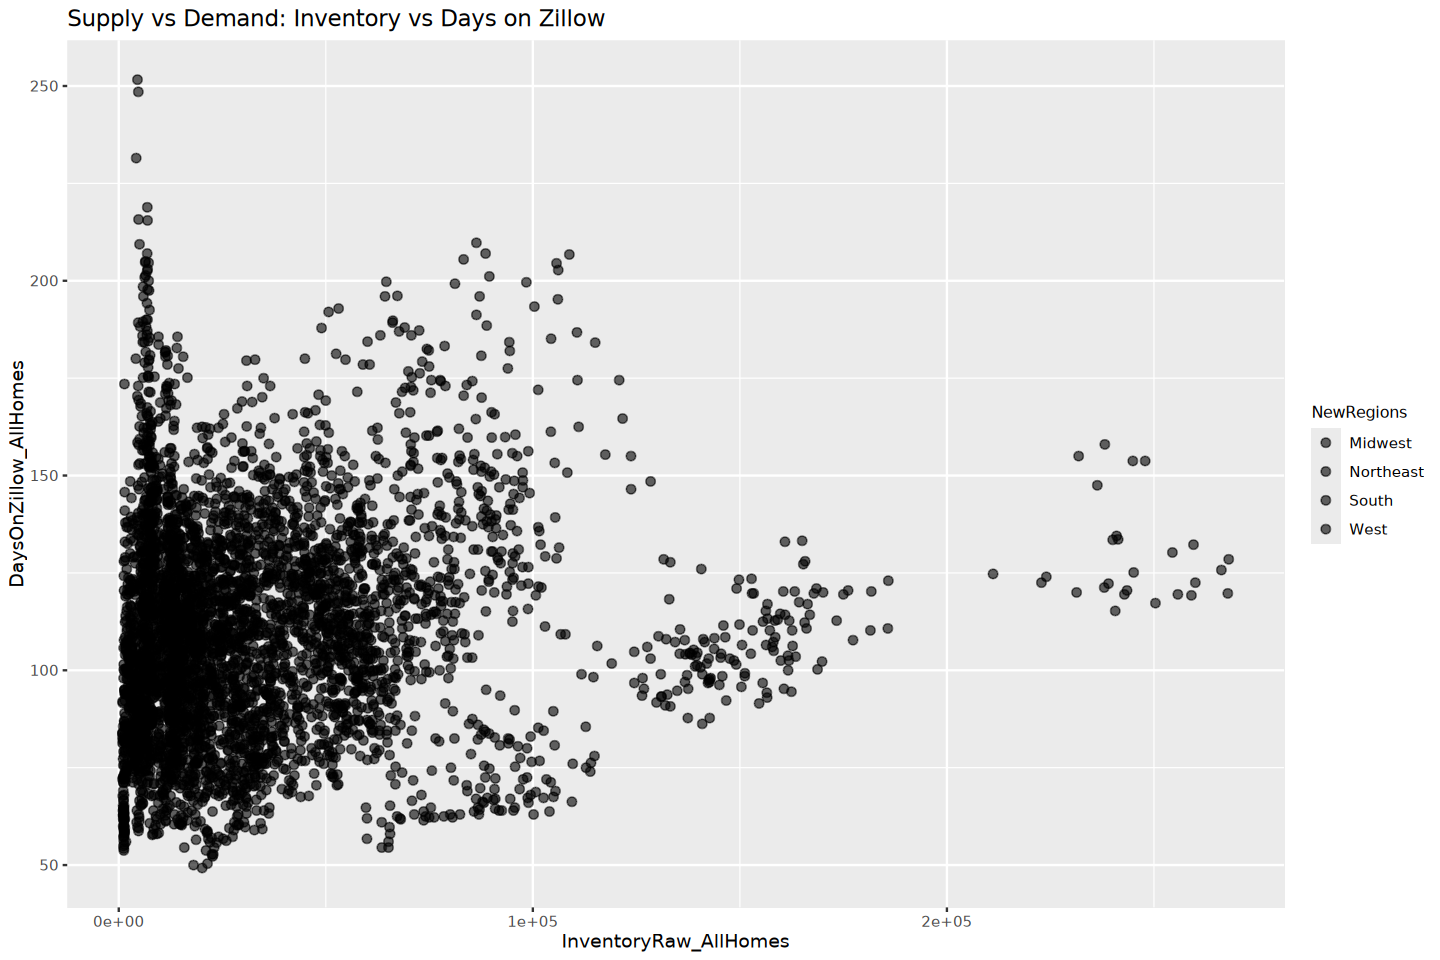

In [38]:
options(repr.plot.width = 12, repr.plot.height = 8)
p_all_homes <- ggplot(
    myDF_cleaned,
    aes(
        x = InventoryRaw_AllHomes,
        y = DaysOnZillow_AllHomes,
        fill = NewRegions
    )
) +
    geom_point(alpha = 0.6, size = 2) +
    labs(
        title = "Supply vs Demand: Inventory vs Days on Zillow",
        x = "InventoryRaw_AllHomes",
        y = "DaysOnZillow_AllHomes"
    ) +
    scale_fill_brewer(palette = "Set2") +
    theme(
        legend.position = "right",
        legend.title = element_text(size = 9)
    )

p_all_homes

In [39]:
midwest_df <- myDF_cleaned %>% filter(NewRegions == "Midwest")
south_df   <- myDF_cleaned %>% filter(NewRegions == "South")

In [40]:
p_midwest <- ggplot(
    midwest_df,
    aes(
        x = InventoryRaw_AllHomes,
        y = DaysOnZillow_AllHomes)
    ) +
    geom_point(color = "steelblue", alpha = 0.6, size = 2) +
    labs(
        title = "Supply vs Demand: Midwest",
        x = "Inventory",
        y = "Days on Zillow"
    ) +
    theme_minimal()

p_south <- ggplot(
    south_df,
    aes(
        x = InventoryRaw_AllHomes,
        y = DaysOnZillow_AllHomes)
    ) +
    geom_point(color = "darkorange", alpha = 0.6, size = 2) +
    labs(
        title = "Supply vs Demand: South",
        x = "Inventory",
        y = "Days on Zillow"
    ) +
    theme_minimal()

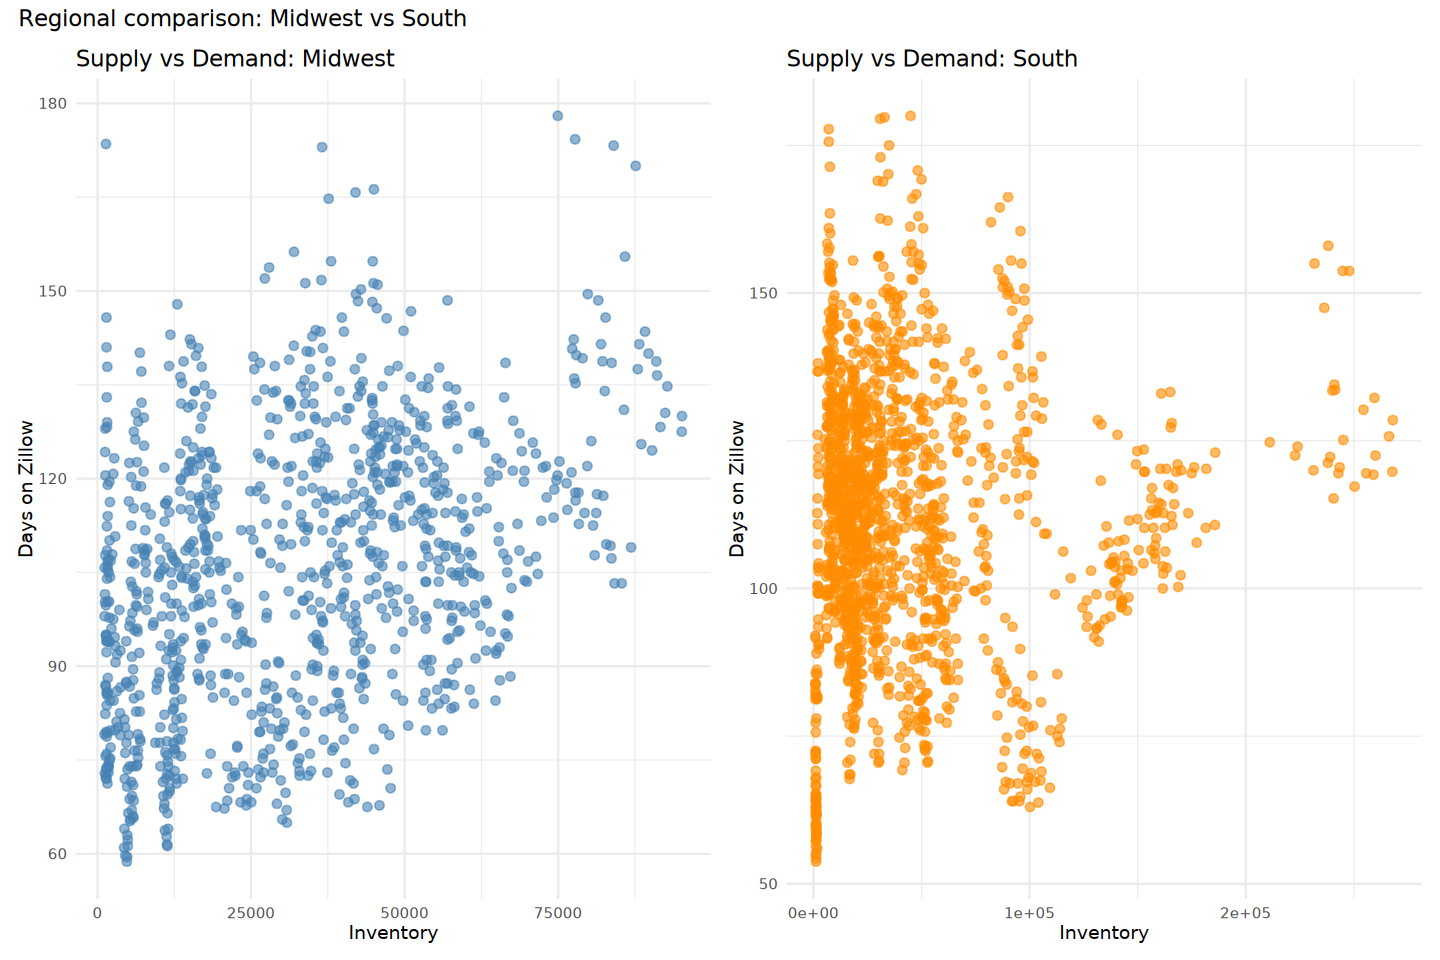

In [41]:
(p_midwest + p_south) + plot_annotation(title = "Regional comparison: Midwest vs South")

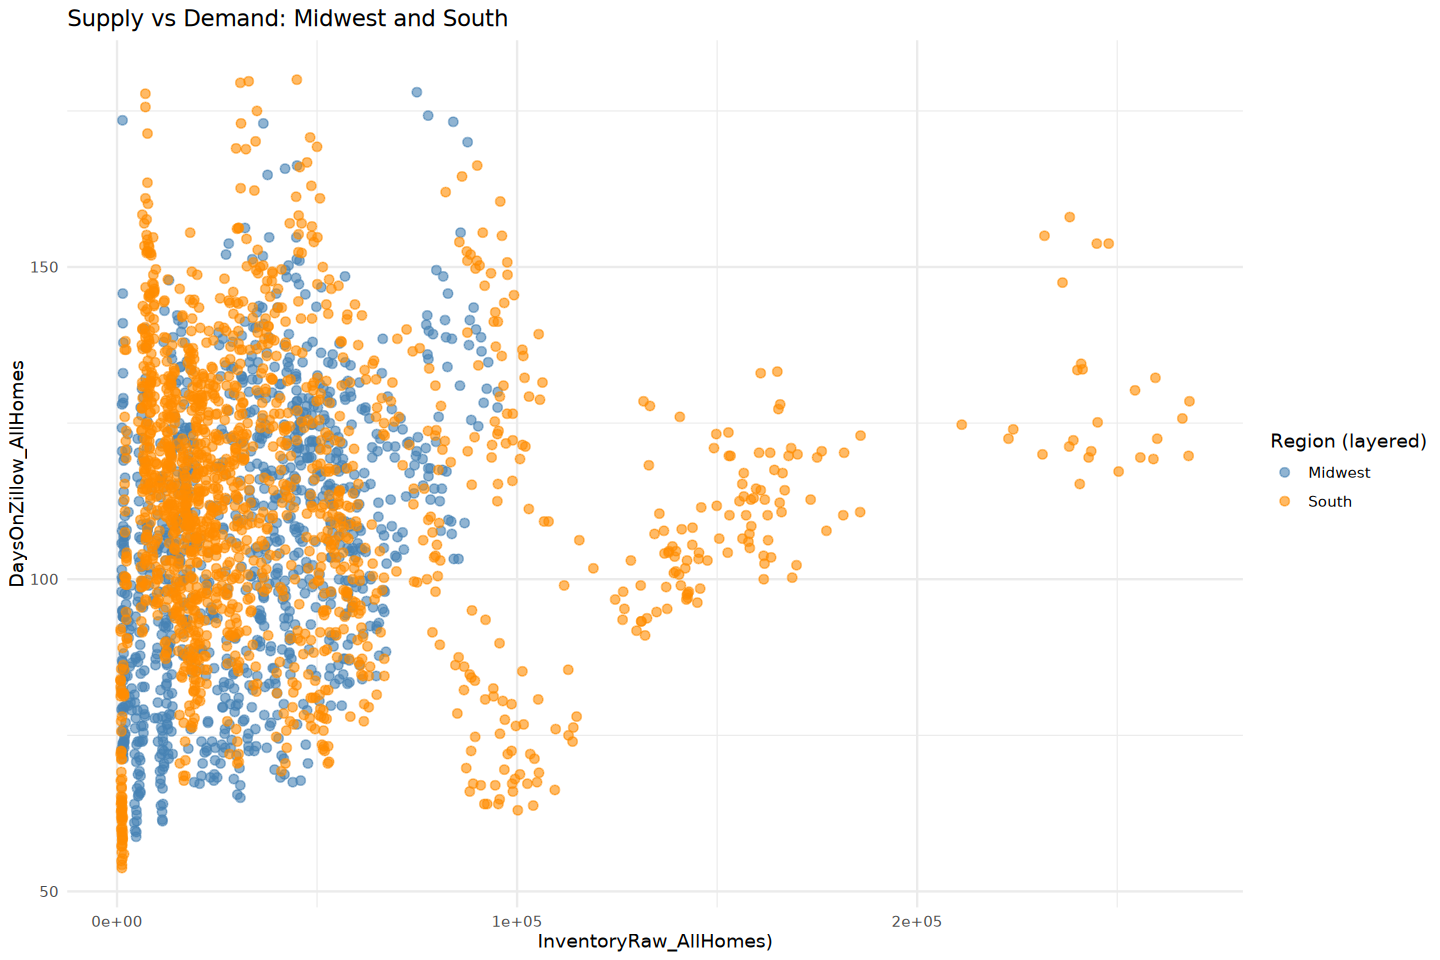

In [42]:
p_combined <- ggplot() +
    geom_point(
        data = midwest_df,
        aes(
            x = InventoryRaw_AllHomes,
            y = DaysOnZillow_AllHomes,
            color = "Midwest"
        ),
        alpha = 0.6,
        size = 2
    ) +
    geom_point(
        data = south_df,
        aes(
            x = InventoryRaw_AllHomes,
            y = DaysOnZillow_AllHomes,
            color = "South"
        ),
        alpha = 0.6,
        size = 2
    ) +
    scale_color_manual(
        name = "Region (layered)",
        values = c("Midwest" = "steelblue", "South" = "darkorange")
    ) +
    labs(
        title = "Supply vs Demand: Midwest and South",
        x = "InventoryRaw_AllHomes)",
        y = "DaysOnZillow_AllHomes"
    ) +
    theme_minimal()

p_combined

I can't seem to figure out how to give color to the `geom_point()` plot even after trying multiple methods. I don't even know if the dots are colored differently at all, but I can't figure out how to fix it.

2.1: See 38. I don't think the "Other" category is relevant to the data we're looking at, so it should be excluded.

2.2: See 41.

2.3: See 42.

## Question 3

In [50]:
library(tidyr)

In [43]:
myDF <- read.csv('/anvil/projects/tdm/data/flights/subset/1997.csv')

In [44]:
myDF_clean <- myDF %>%
  filter(!is.na(DepDelay) & !is.na(ArrDelay))

In [57]:
summaryDF <- myDF_clean %>%
    select(DepDelay, ArrDelay, Month) %>%
    pivot_longer(cols = c(DepDelay, ArrDelay)) %>%
    group_by(Month, name) %>%
    summarise(mean = mean(value),
        high = mean(value) + sd(value),
        low  = mean(value) - sd(value))

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


In [58]:
head(summaryDF)

Month,name,mean,high,low
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,ArrDelay,12.290145,44.91143,-20.33114
1,DepDelay,11.802902,41.75187,-18.14607
2,ArrDelay,9.014008,38.75252,-20.72450
2,DepDelay,9.265771,37.47111,-18.93957
3,ArrDelay,7.311369,35.26029,-20.63756
3,DepDelay,8.433000,35.30937,-18.44337


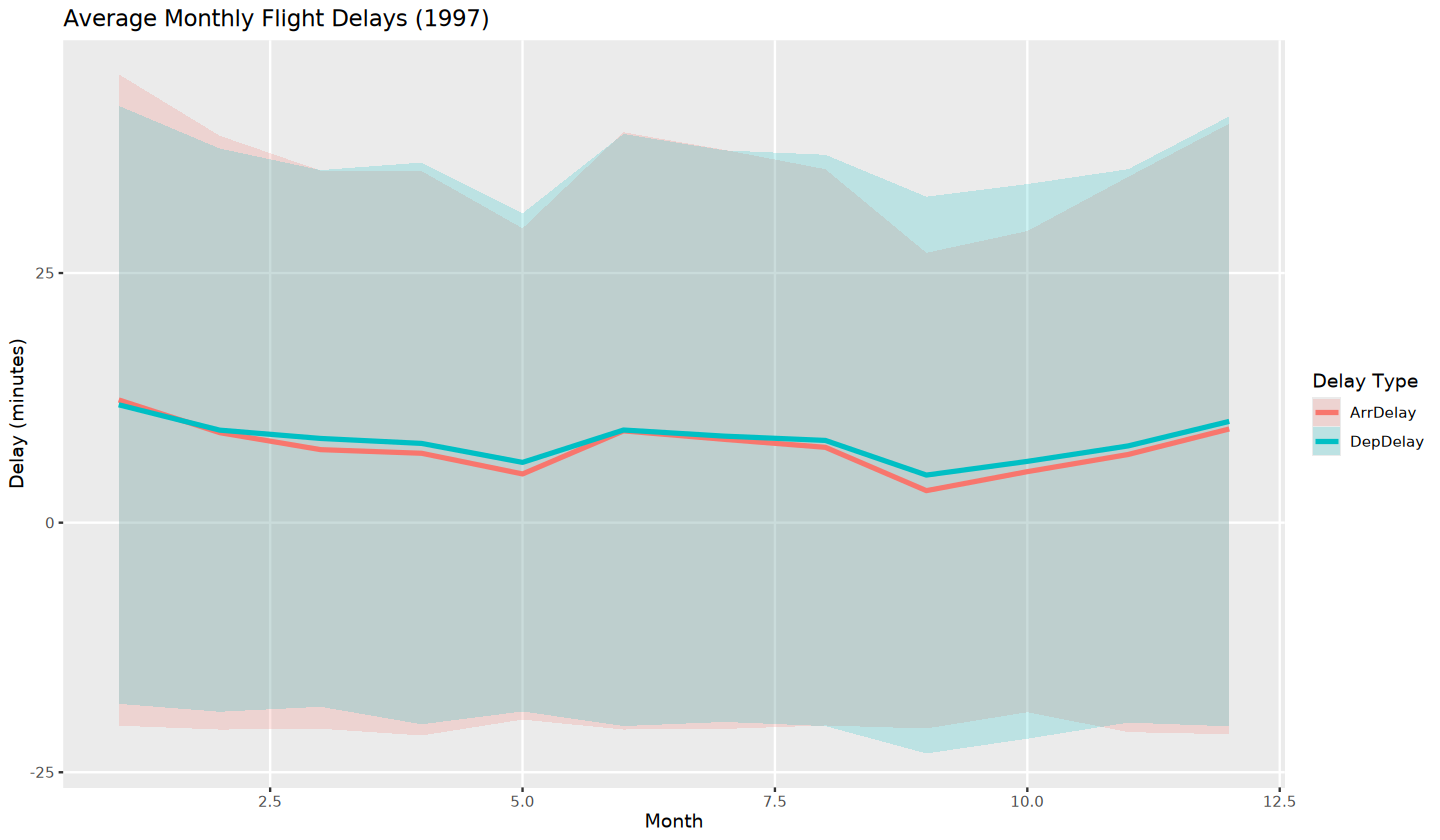

In [64]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(
    summaryDF,
    aes(
        x = Month,
        y = mean,
        color = name,
        fill = name
    )
) +
    geom_ribbon(
        aes(ymin = low, ymax = high),
        alpha = 0.2,
        color = NA
    ) +
    geom_line(linewidth = 1.1) +
    labs(
        title = "Average Monthly Flight Delays (1997)",
        x = "Month",
        y = "Delay (minutes)",
        color = "Delay Type",
        fill = "Delay Type"
    ) +
    theme(
        legend.position = "right",
        panel.grid.minor = element_blank()
    )

The ribbon plot looks very cool, and I like how we can see both delay types in this graph easily by seeing the slight difference in color in the background.

3.1: See 58. Each row shows the mean, high, and low delay for either arrivals or departures.

3.2: See 64.

3.3: You could also use it to show other measures of variation like the middle 50% or the top or bottom 10%, for example. It would narrow the ribbon area to a different above or below the center, but within the current region.

## Question 4

In [65]:
build_origin_summary <- function(df, origin_code) {
  df %>%
    filter(Origin == origin_code) %>%
    select(Month, DepDelay, ArrDelay) %>%
    pivot_longer(cols = c(DepDelay, ArrDelay),
                 names_to = "name",
                 values_to = "value") %>%
    group_by(Month, name) %>%
    summarise(
      mean = mean(value, na.rm = TRUE),
      high = mean(value, na.rm = TRUE) + sd(value, na.rm = TRUE),
      low  = mean(value, na.rm = TRUE) - sd(value, na.rm = TRUE),
    )
}

In [66]:
summary_phx <- build_origin_summary(myDF_clean, "PHX")

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


In [67]:
plot_origin_summary <- function(summaryDF, origin_label, colors = c("steelblue", "tomato")) {
    ggplot(
        summaryDF,
        aes(
            x = Month,
            y = mean,
            group = name
        )
    ) +
    geom_ribbon(
        aes(
            ymin = low,
            ymax = high,
            fill = name
        ),
        alpha = 0.18,
        color = NA
    ) +
    geom_line(aes(color = name), size = 1) +
    scale_x_continuous(breaks = 1:12) +
    scale_color_manual(values = c("ArrDelay" = colors[1], "DepDelay" = colors[2])) +
    scale_fill_manual(values  = c("ArrDelay" = colors[1], "DepDelay" = colors[2])) +
    labs(
        title = paste("Average Monthly Delays for", origin_label),
        x = "Month",
        y = "Delay (minutes)",
        color = "Delay type",
        fill = "Delay type"
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)
    )
}

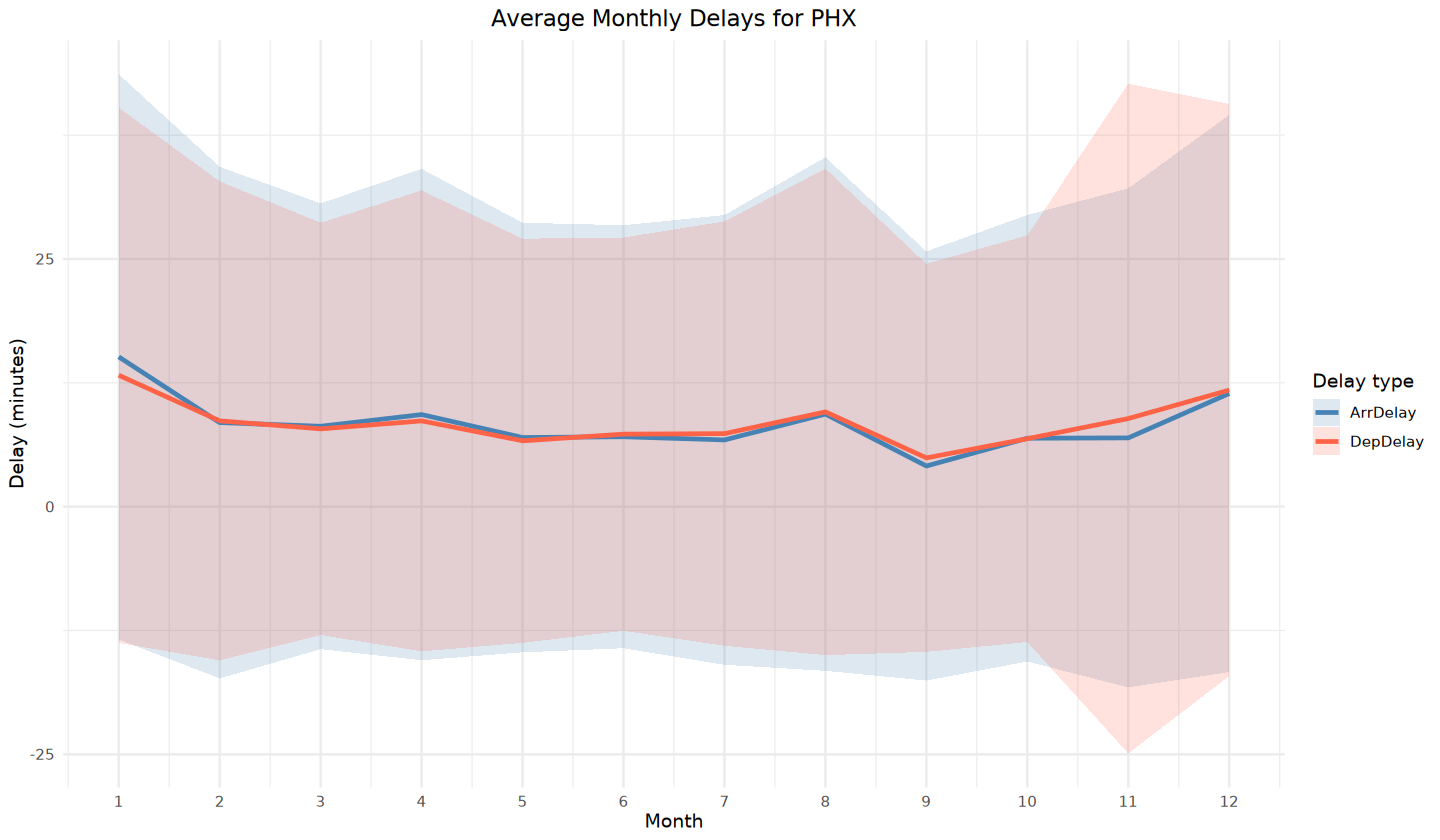

In [69]:
p_phx <- plot_origin_summary(summary_phx, "PHX")
p_phx

In [70]:
summary_lax <- build_origin_summary(myDF_clean, "LAX")
summary_jfk <- build_origin_summary(myDF_clean, "JFK")

p_lax <- plot_origin_summary(summary_lax, "LAX", colors = c("#4daf4a", "#984ea3"))
p_jfk <- plot_origin_summary(summary_jfk, "JFK", colors = c("#377eb8", "#e41a1c"))

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


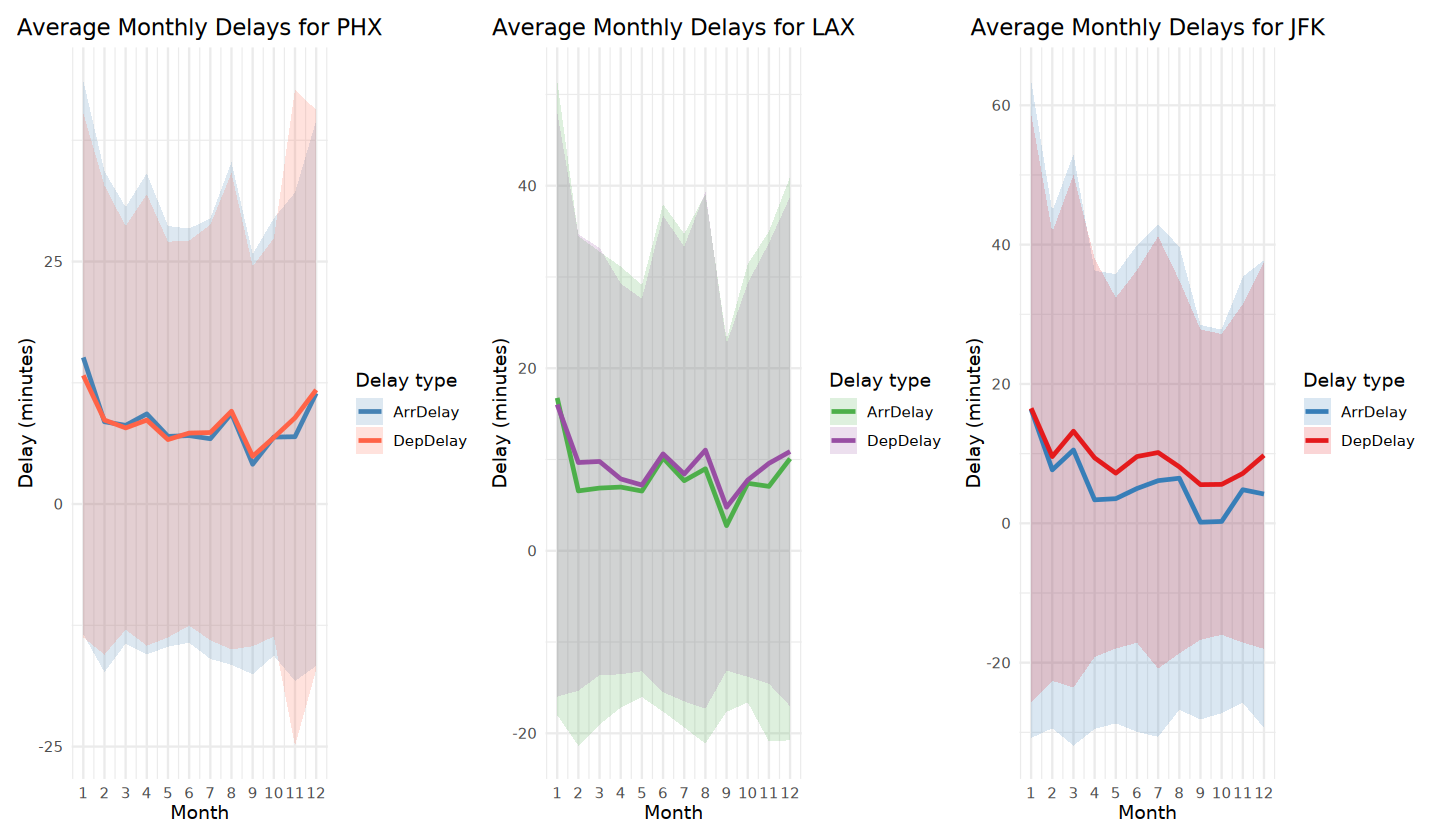

In [71]:
p_phx + p_lax + p_jfk

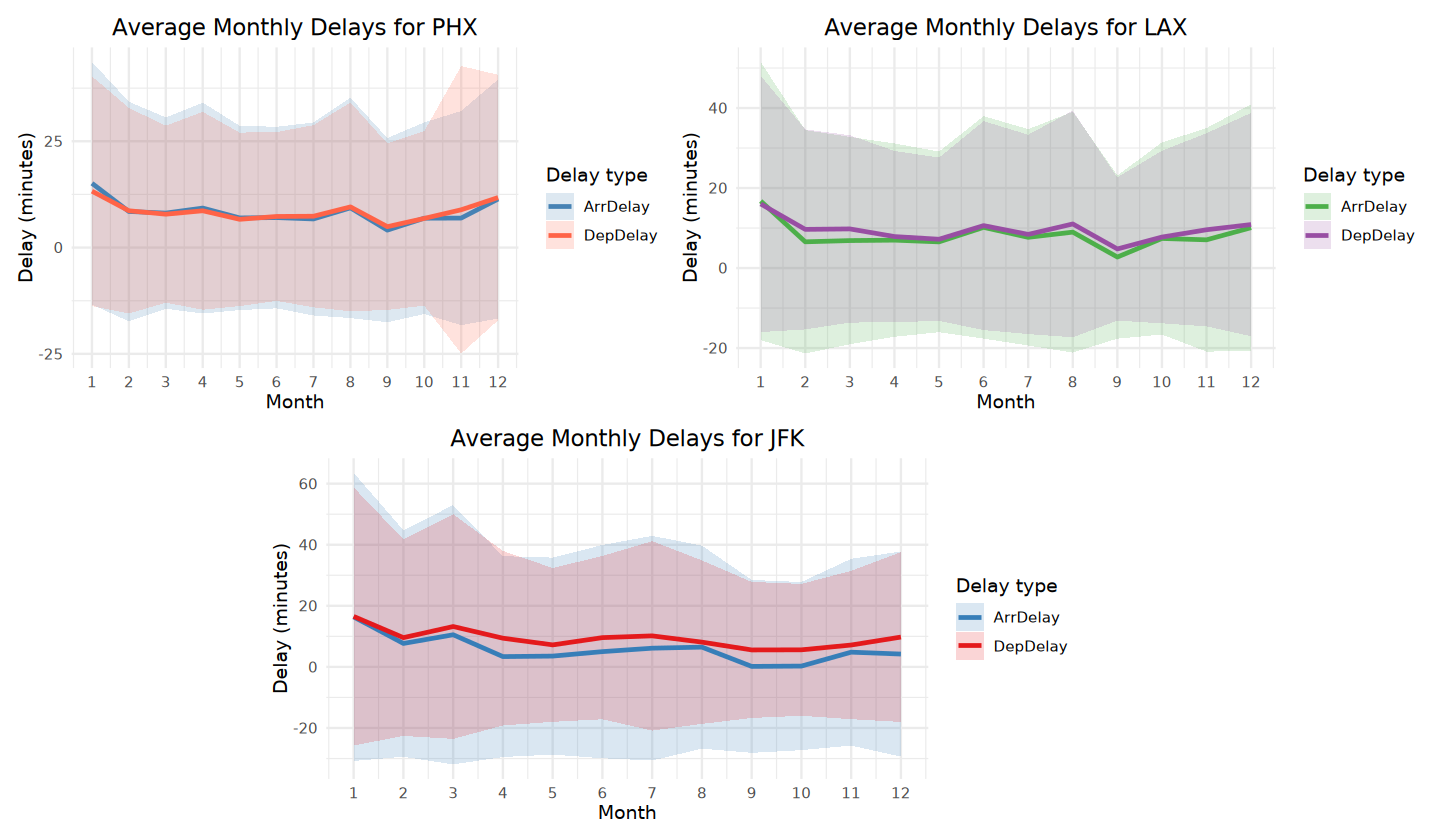

In [72]:
wrap_plots(A = p_phx, B = p_lax, C = p_jfk, design = "AABB\n#CC#")

Using functions for this question really came in handy because there's so much repetition in this.

4.1: I noticed that Arrival and Departure delay are always very very similar. You can also ee in the graphs that there are spikes during winter and summer months, most likely due to those being common vacation months.

4.2: I noticed that during the winter months in Phoenix, the departure delays seem to spark while arrival delays don't follow the same trend as much. In both LAX and JFK, though JFK is more extreme, the lower bound for arrival delay is much lwoer than that of departure delay. Finally, LAX has spikes in both delay types a lot higher than the other two during the summer months, probably due to tourism.

4.3: See 71 and 72. I prefer 72 a lot more because it looks much less squished so it's easier to read.

## Question 5

In [75]:
myDF <- read.csv("/anvil/projects/tdm/data/zillow/Metro_time_series.csv")

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


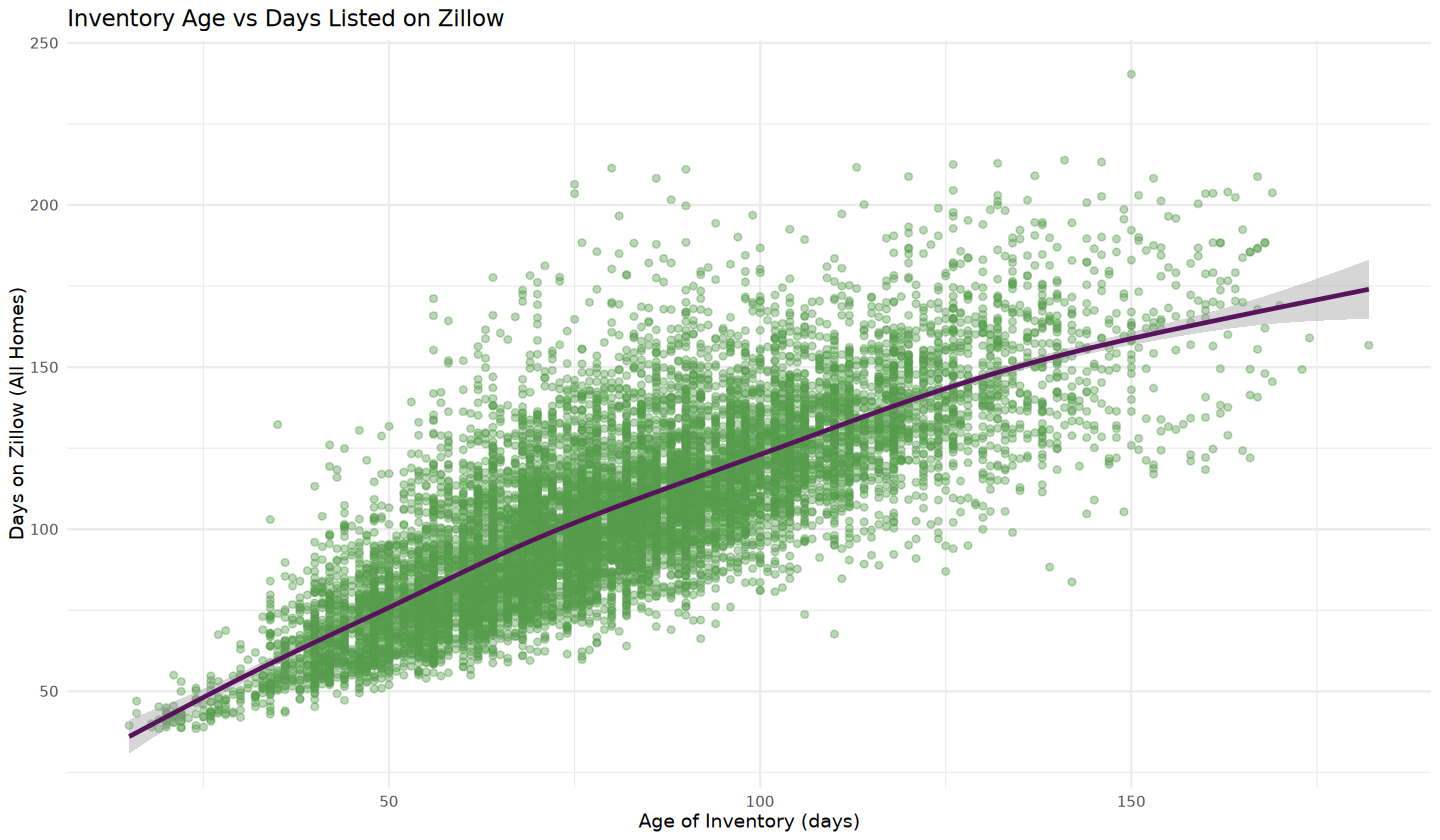

In [76]:
myDF_clean <- myDF %>%
  filter(!is.na(AgeOfInventory), !is.na(DaysOnZillow_AllHomes))

ggplot(myDF_clean, aes(x = AgeOfInventory, y = DaysOnZillow_AllHomes)) +
  geom_point(alpha = 0.4, color = "#559c4b") +
  geom_smooth(color = "#58135c") +
  labs(title = "Inventory Age vs Days Listed on Zillow",
       x = "Age of Inventory (days)",
       y = "Days on Zillow (All Homes)") +
  theme_minimal()

`geom_smooth()` using method = 'gam'


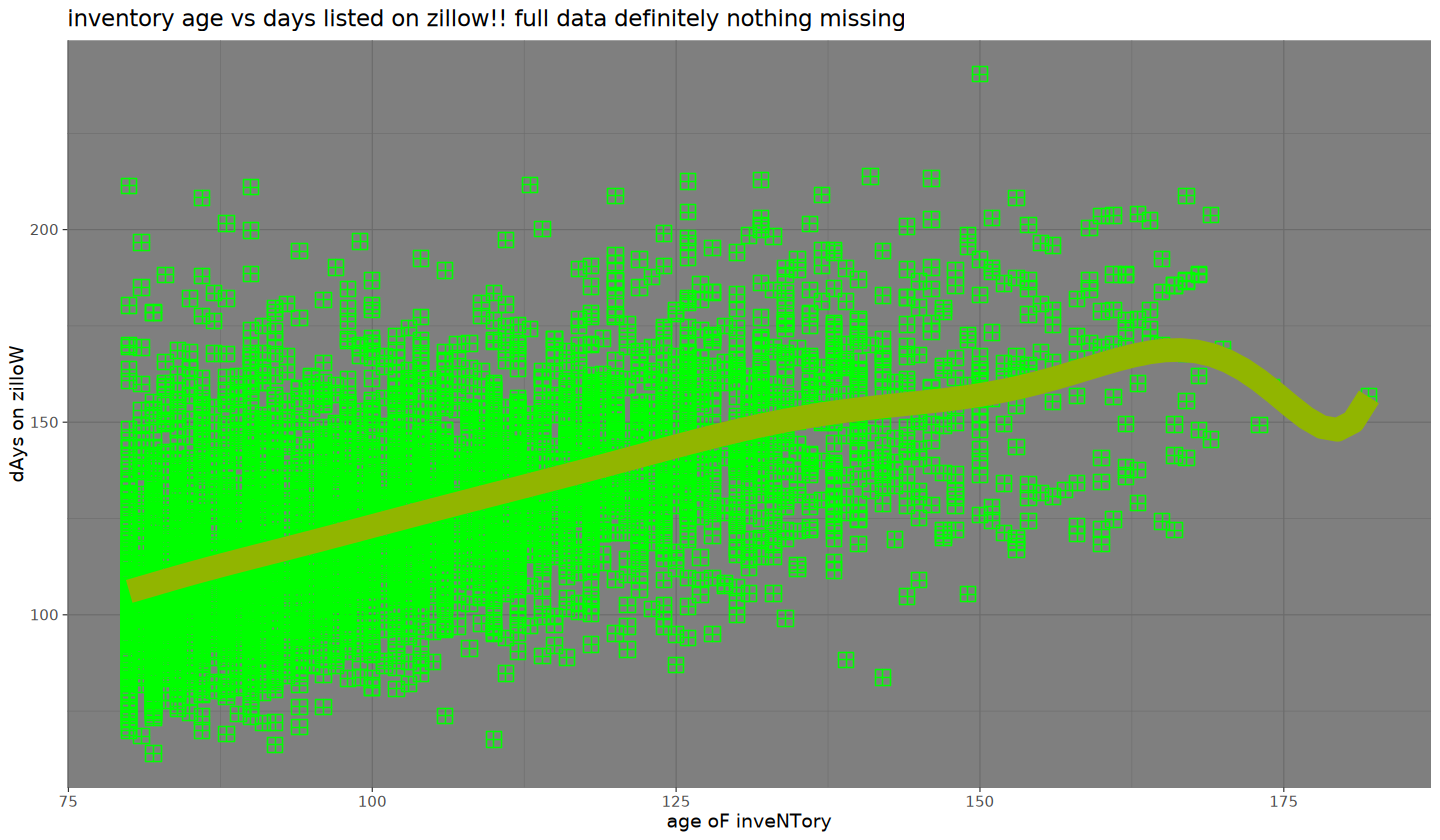

In [77]:
myDF_bad <- myDF_clean %>%
    filter(AgeOfInventory > quantile(AgeOfInventory, 0.50))

ggplot(myDF_bad, aes(x = AgeOfInventory, y = DaysOnZillow_AllHomes)) +
  geom_point(color = "green", shape=12, size=4) +
  geom_smooth(formula = y ~ poly(x, 10),
              se = FALSE,
              color = "#91b500",
              linewidth = 5) +
  labs(title = "inventory age vs days listed on zillow!! full data definitely nothing missing",
       x = "age oF inveNTory",
       y = "dAys on zilloW") +
  theme_dark()

In [79]:
library(lubridate)

In [80]:
myDF_time <- myDF %>%
  filter(!is.na(Date), !is.na(MedianListingPrice_AllHomes)) %>%
  mutate(new_date = as.Date(Date, format = "%Y-%m-%d")) %>%
  group_by(new_date) %>%
  summarize(avg_price = mean(MedianListingPrice_AllHomes, na.rm = TRUE)) %>%
  ungroup()

myDF_time2 <- myDF_time %>%
  filter(new_date >= min(new_date) + months(30), new_date <= max(new_date) - months(40))

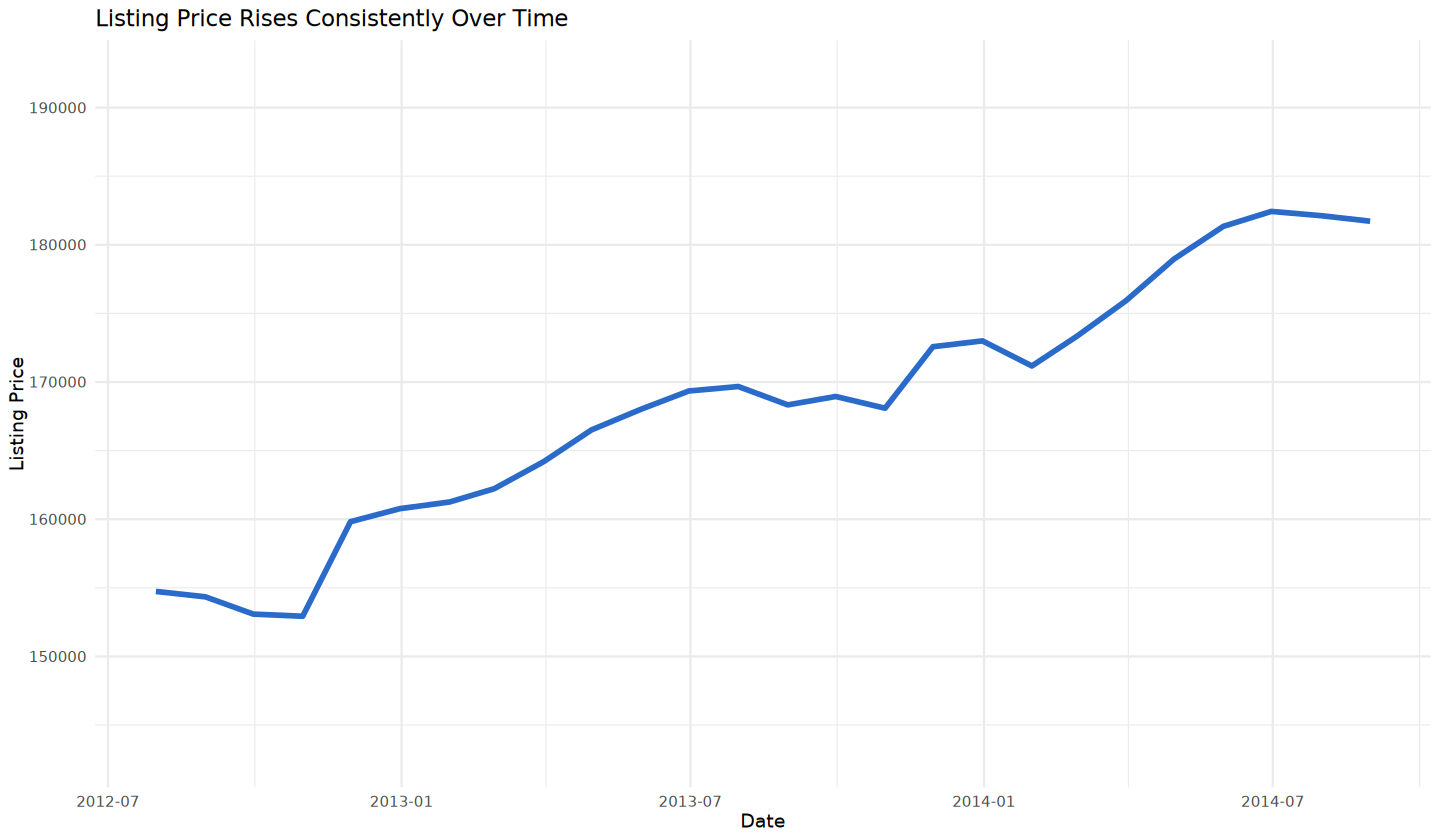

In [81]:
ggplot(myDF_time2, aes(x = new_date, y = avg_price)) +
  geom_line(color = "#2a6ac9", size = 1.2) +
  labs(title = "Listing Price Rises Consistently Over Time",
       x = "Date",
       y = "Listing Price") +
  theme_minimal() +
  scale_y_continuous(limits = c(min(myDF_time2$avg_price) - 10000,
                                max(myDF_time2$avg_price) + 10000))

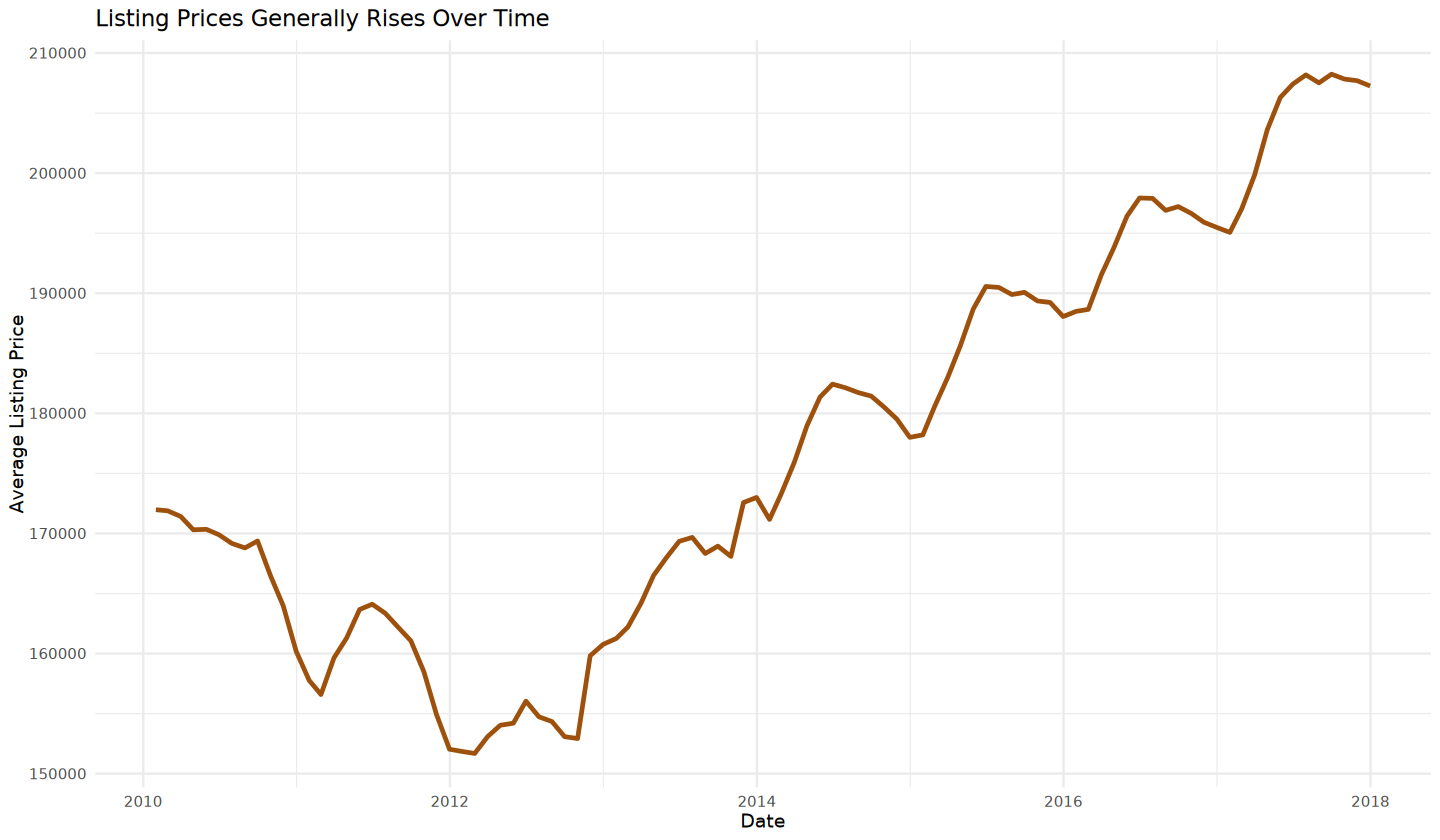

In [82]:
ggplot(myDF_time, aes(x = new_date, y = avg_price)) +
  geom_line(color = "#9e510d", size = 1) +
  labs(title = "Listing Prices Generally Rises Over Time",
       x = "Date",
       y = "Average Listing Price") +
  theme_minimal()

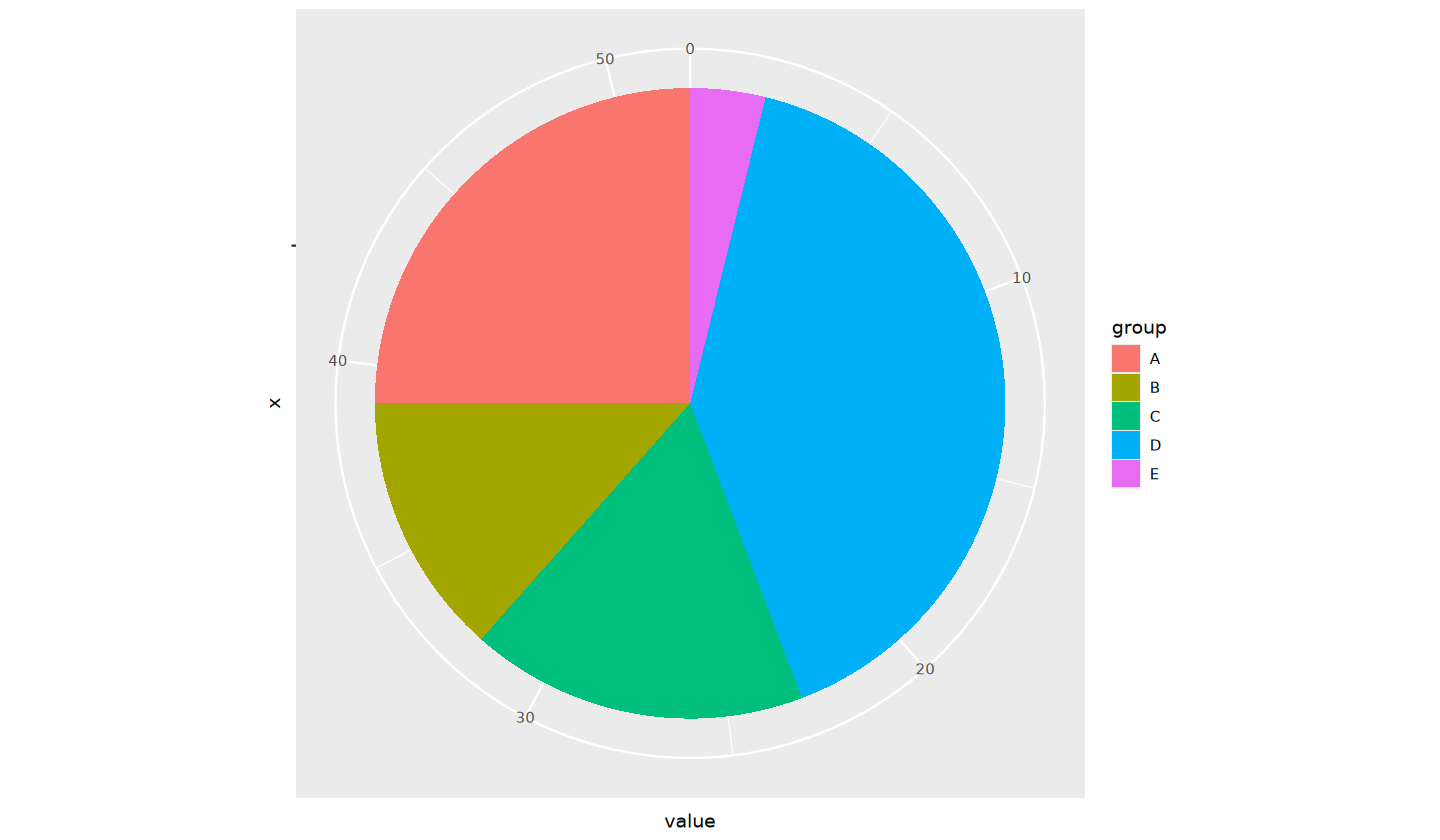

In [83]:
data <- data.frame(
  group=LETTERS[1:5],
  value=c(13,7,9,21,2)
)

ggplot(data, aes(x="", y=value, fill=group)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)

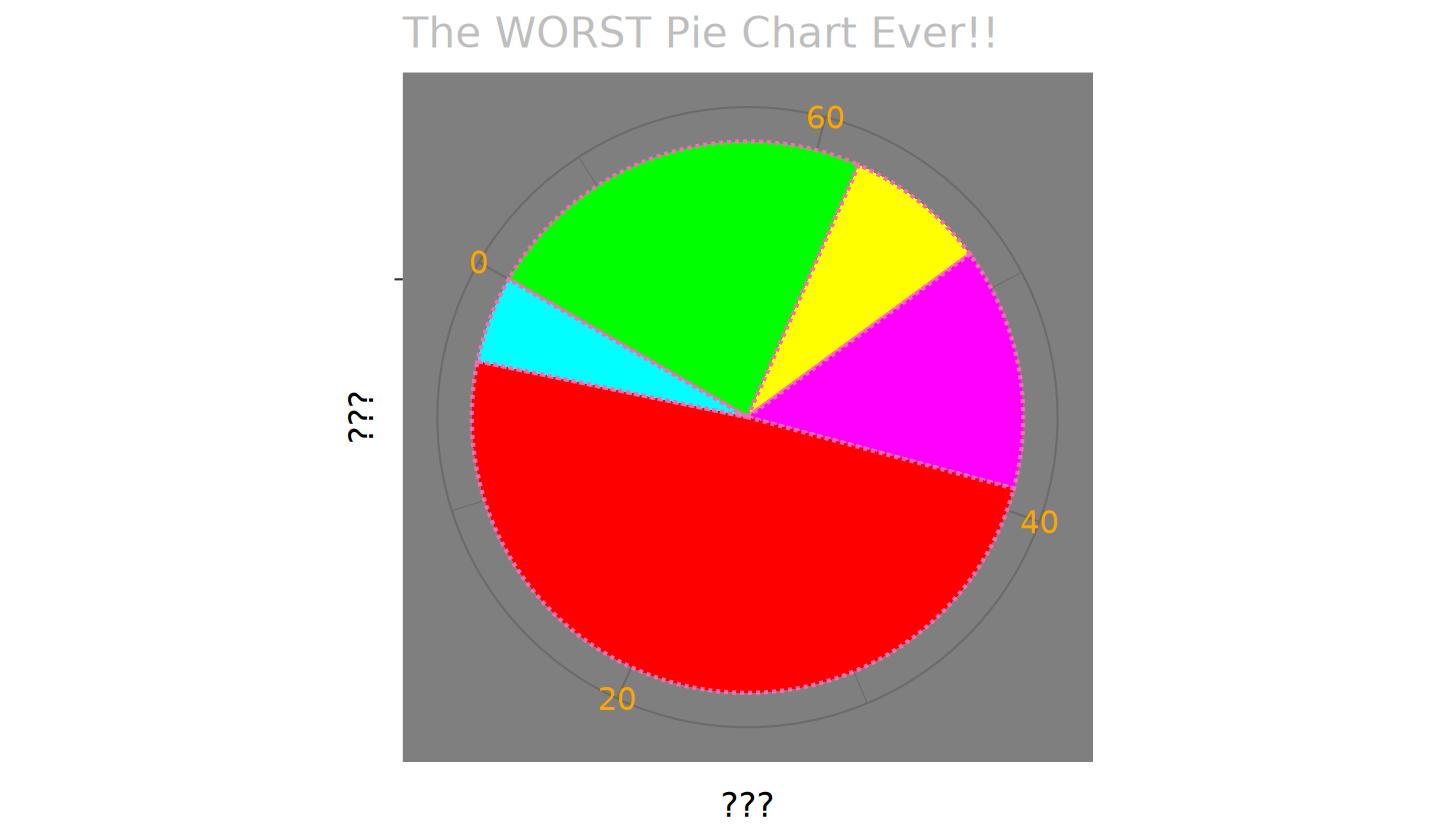

In [87]:
data <- data.frame(
  group=LETTERS[1:5],
  value=c(13,7,9,21,2)
)

ggplot(data, aes(x = "", y = value * runif(5, 0.5, 2), fill = group)) +
  geom_bar(stat = "identity", width = 5, color = "hotpink", linetype = "dashed") +
  coord_polar("y", start = pi / 3, direction = -1) +
  scale_fill_manual(values = c("green", "yellow", "magenta", "red", "cyan")) +
  labs(
    title = "The WORST Pie Chart Ever!!",
    x = "???",
    y = "???"
  ) +
  theme_dark(base_size = 20) +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 25, face = "bold.italic", color = "gray"),
    axis.text = element_text(size = 18, color = "orange")
  )

5.1: I'd say some key components to a good plot are that all of the data is represented in it. Having good visuals with appropriate titles and axis titles also helps a lot, as a plot that has bad naming schemes or generally looks ugly will be seen as untrustworthy. Between plots 3 and 4, you can see how 3 has only taken a subset of plot 4 just to show the "consistent" rising in listing prices, while plot 4 shows the peaks and dips over time.

5.2: In plot 1, we see how good naming, showing all of the data, and a clean look contribute to being a good plot, while plot 2's ugly color scheme, filtered data, and inappropriate axis names make it a bad plot. Between plots 3 and 4, it was already discussed how plot 3 filters the data as well to show only what supports its conclusion, while plot 4 uses good labels and shows the whole time frame.

5.3: I randomly changed data value, removed labeling and flipped the chart, and made the colors super ugly. It makes the pie chart worse by making it completely unreadable so it doesn't represent any data whatsoever.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
